In [109]:
## Joshua Project, smallest and biggest 10 Frontier Peoples from https://joshuaproject.net/frontier/1
import numpy as np
import pandas as pd
csv = pd.read_csv("data/frontier_peoples.csv").sort_values('Population')
df = csv[csv.Population.notnull()]
df.head(10).append(df.tail(10))

,ID,People,Country,Language,Religion,Indigenous,10/40 Window,PeopleID3,Rog3,Frontier,PopulationRange,% Adherents Source,% Christian Adherents,Population,Workers Needed
3408,20755IR,Dezfuli,Iran,Dezfuli,Islam,Yes,Yes,20755,IR,Y,1,0.00%,0.00%,10.0,1.0
1156,21569BR,Baena,Brazil,Portuguese,Ethnic Religions,Yes,No,21569,BR,Y,1,0.00%,0.00%,20.0,1.0
600,12682NI,Kila,Nigeria,Somyev,Islam,Yes,Yes,12682,NI,Y,1,0.00%,0.00%,20.0,1.0
1170,18870BR,Yakarawakta,Brazil,Uru-Eu-Wau-Wau,Ethnic Religions,Yes,No,18870,BR,Y,1,0.00%,0.00%,30.0,1.0
1603,18649CH,Ongkor,China,Evenki,Ethnic Religions,Yes,Yes,18649,CH,Y,1,0.00%,0.00%,30.0,1.0
611,12805BR,Korubo,Brazil,Korubo,Ethnic Religions,Yes,No,12805,BR,Y,1,0.00%,0.00%,50.0,1.0
1169,21568BR,Turiwara,Brazil,Turiwara,Ethnic Religions,Yes,No,21568,BR,Y,1,0.00%,0.00%,60.0,1.0
1184,19238MT,"Jew, Maltese",Malta,Maltese,Ethnic Religions,Yes,No,19238,MT,Y,1,0.00%,0.00%,60.0,1.0
881,14357BX,Penan,Brunei,"Penan, Eastern",Ethnic Religions,Yes,Yes,14357,BX,Y,1,0.00%,0.00%,60.0,1.0
1172,21649CO,Siripu,Colombia,Cuiba,Ethnic Religions,Yes,No,21649,CO,Y,1,0.00%,0.00%,70.0,1.0


<AxesSubplot:xlabel='Population'>

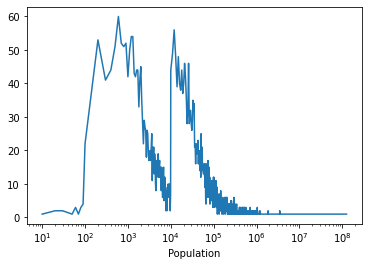

In [93]:
## number of frontier people groups by population size showing most of them are in between 10^2 to 10^5 (100 to 90,000) a size of a village, town or city
people_by_population = df.groupby("Population")["ID"].count()
people_by_population.plot(y="People Group Count", x="Population", logx=True)

In [94]:
## total number of frontier people groups
pop = df["Population"]
pop.count()

4985

In [95]:
## number of frontier people groups grouped by population in a table

def logs(n):
    return pow(10, n)

def label(n):
    return f'10^{n}'

bins = list(map(logs, np.arange(2, 8)))
bins.insert(0, pop.min())
bins.append(pop.max())
labels = list(map(label, np.arange(2, 9)))
summary = pd.cut(pop, bins, labels=labels)
summary.value_counts().sort_index()

10^2      38
10^3     446
10^4    1536
10^5    1760
10^6     935
10^7     236
10^8      33
Name: Population, dtype: int64

In [96]:
## total population of frontier people groups grouped by population in a table
df.groupby(summary)["Population"].sum()

Population
10^2         3200.0
10^3       268000.0
10^4      6317800.0
10^5     70958000.0
10^6    295429000.0
10^7    695226000.0
10^8    912832000.0
Name: Population, dtype: float64

<AxesSubplot:xlabel='Population'>

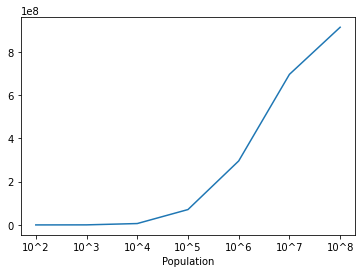

In [97]:
## total population of frontier people groups grouped by population in a graph

df.groupby(summary)["Population"].sum().plot()

In [98]:
# number of frontier people group split by population below and above 10^6

pd.cut(pop, bins=[pop.min(), pow(10, 6), pop.max()]).value_counts().sort_index()

(10.0, 1000000.0]           4715
(1000000.0, 125776000.0]     269
Name: Population, dtype: int64

In [99]:
# number of frontier people group split by population below and above 10^7

pd.cut(pop, bins=[pop.min(), pow(10, 7), pop.max()]).value_counts().sort_index()


(10.0, 10000000.0]           4951
(10000000.0, 125776000.0]      33
Name: Population, dtype: int64